In [95]:
import torch
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.draw import random_shapes
import cv2
import pandas as pd
import random

In [160]:
#Function to generate the random shape of a size between given bounds
def shape_gen(minimum,maximum):
    x = random_shapes((32, 32), max_shapes=1, multichannel=False, intensity_range=(0,0),min_size = minimum, max_size=maximum)[0]
    x = -1*x+255
    return(x)

In [161]:
#Create array of start images
images_seq = [shape_gen(10,25) for i in range(1000)]
images_seq = np.array(images_seq)
images_seq = np.expand_dims(images_seq,1)
images_seq.shape

(1000, 1, 32, 32)

In [163]:
#For a given collection of start images with (n,1,k,k), with n images of dimension k by k. Trans_range is one-sided,
#so trans_range = 4 allows translations of 4 up or down, 4 left or right. same for rot_center, how much the center of 
#rotation can shift to one-side both up/down. rot_angle is maximum angle in DEGREES
def rand_trans(data, trans_range, rot_center, rot_angle): 
    n, row, col = data[:,0,:,:].shape
    Index = [random.randint(0,1) for i in range(n)] #randomly choose either translation or rotation
    
    def M_gen(i):
        if i == 0:
            hor = random.randint(-trans_range, trans_range)
            ver = random.randint(-trans_range, trans_range)
            x = np.float32([[1,0,hor],[0,1,ver]]) #create translation matrix
        else:
            center = (row/2+random.randint(-rot_center,rot_center),col/2+random.randint(-rot_center,rot_center))
            angle = random.uniform(0,rot_angle)
            x = cv2.getRotationMatrix2D(center,angle,1) #create rotation matrix
        return(x)
    
    Z = np.array([M_gen(i) for i in Index])
    
    return(Z)
    

In [164]:
M = rand_trans(images_seq, 3, 3, 45)
M.shape

(1000, 2, 3)

In [165]:
#for a given collection of start images - "data" - and their associated transformations -"transform", one for each start image-
#will generate a movie sequence of the desired length. note "data" should be np.array of shape (n,1,k,k).
def image_gen(data, transform, movie_len):
    X = data
    for j in range(movie_len-1):
        Y = np.array([cv2.warpAffine(X[i,j],M[i],(32,32)) for i in range(data.shape[0])])
        Y = np.expand_dims(Y,1)
        X = np.concatenate((X,Y),axis=1)
    
    return(X)

In [166]:
new = image_gen(images_seq, M, 10)

In [167]:
M[17]

array([[ 1.,  0.,  1.],
       [ 0.,  1., -3.]])

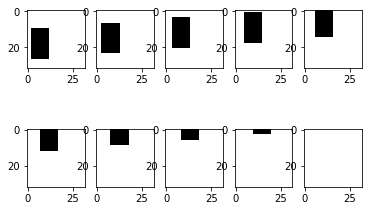

In [168]:
#Plot to show it works
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(new[17,i],cmap = "Greys")

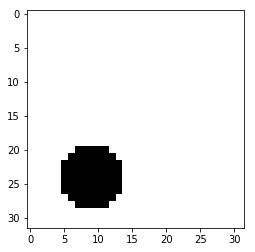

In [105]:
#Translation matrix
col, row = 32, 32

M = np.float32([[1,0,-10],[0,1,5]])
dst = cv2.warpAffine(test,M,(col,row))

plt.imshow(dst,cmap='Greys')

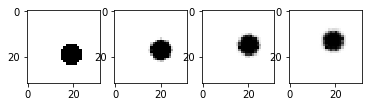

In [132]:
#Rotation matrix

N = cv2.getRotationMatrix2D((col/2,row/2),30,1) #center, angle, scaling
dst2 = cv2.warpAffine(test,N,(col,row))
dst3 = cv2.warpAffine(dst2,N,(col,row))
dst4 = cv2.warpAffine(dst3,N,(col,row))

c = [test,dst2,dst3,dst4]

for i in range(4):
    plt.subplot(1,4, i+1)
    plt.imshow(c[i],cmap = "Greys")